<a href="https://colab.research.google.com/github/molarking/AI-classify/blob/main/01057011_AI_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import sklearn as sk
import os
from IPython.display import clear_output, display
%matplotlib inline

tf.get_logger().setLevel('ERROR')

try:
    from treeinterpreter import treeinterpreter as ti
except:
    !pip install treeinterpreter
    from treeinterpreter import treeinterpreter as ti

try:
    import kaggle
except:
    from google.colab import files
    files.upload() #this will prompt you to update the json

    !pip install -q kaggle
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !ls ~/.kaggle
    !chmod 600 /root/.kaggle/kaggle.json  # set permission


Saving kaggle.json to kaggle.json
kaggle.json


In [ ]:
import os
# 創建.kaggle目錄
os.makedirs('/root/.kaggle/', exist_ok=True)
# 移動kaggle.json到.kaggle目錄
!cp kaggle.json /root/.kaggle/
# 設置kaggle.json文件的權限
!chmod 600 /root/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats


 98% 798M/812M [00:21<00:00, 102MB/s] 
100% 812M/812M [00:22<00:00, 37.6MB/s]


In [ ]:
!unzip dogs-vs-cats.zip -d dogs-vs-cats
!unzip dogs-vs-cats/train.zip -d dogs-vs-cats/train
!unzip dogs-vs-cats/test1.zip -d dogs-vs-cats/test


串流輸出內容已截斷至最後 5000 行。
  inflating: dogs-vs-cats/test/test1/5499.jpg  
  inflating: dogs-vs-cats/test/test1/55.jpg  
  inflating: dogs-vs-cats/test/test1/550.jpg  
  inflating: dogs-vs-cats/test/test1/5500.jpg  
  inflating: dogs-vs-cats/test/test1/5501.jpg  
  inflating: dogs-vs-cats/test/test1/5502.jpg  
  inflating: dogs-vs-cats/test/test1/5503.jpg  
  inflating: dogs-vs-cats/test/test1/5504.jpg  
  inflating: dogs-vs-cats/test/test1/5505.jpg  
  inflating: dogs-vs-cats/test/test1/5506.jpg  
  inflating: dogs-vs-cats/test/test1/5507.jpg  
  inflating: dogs-vs-cats/test/test1/5508.jpg  
  inflating: dogs-vs-cats/test/test1/5509.jpg  
  inflating: dogs-vs-cats/test/test1/551.jpg  
  inflating: dogs-vs-cats/test/test1/5510.jpg  
  inflating: dogs-vs-cats/test/test1/5511.jpg  
  inflating: dogs-vs-cats/test/test1/5512.jpg  
  inflating: dogs-vs-cats/test/test1/5513.jpg  
  inflating: dogs-vs-cats/test/test1/5514.jpg  
  inflating: dogs-vs-cats/test/test1/5515.jpg  
  inflating: dogs-vs-ca

In [ ]:
import zipfile
import os

# Define paths to the zip files
train_zip_path = 'dogs-vs-cats/train.zip'
test_zip_path = 'dogs-vs-cats/test1.zip'

# Define directories to extract the data
train_extract_dir = '/kaggle/working/train'
test_extract_dir = '/kaggle/working/test'

# Create directories if they don't exist
os.makedirs(train_extract_dir, exist_ok=True)
os.makedirs(test_extract_dir, exist_ok=True)

# Unzip train data
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_extract_dir)

# Unzip test data
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extract_dir)

# List extracted files
print("Train data extracted to:", os.listdir(train_extract_dir))
print("Test data extracted to:", os.listdir(test_extract_dir))

Train data extracted to: ['train']
Test data extracted to: ['test1']


In [ ]:
import shutil
from sklearn.model_selection import train_test_split
# Create directories for training and validation splits
base_dir = '/kaggle/working/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Create subdirectories for train and validation
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(train_cats_dir, exist_ok=True)
os.makedirs(train_dogs_dir, exist_ok=True)
os.makedirs(validation_cats_dir, exist_ok=True)
os.makedirs(validation_dogs_dir, exist_ok=True)

# Define the paths to the original training data
original_train_dir = '/kaggle/working/train/train'
# print(os.listdir('/kaggle/working/train'))
# Split the dataset into training and validation sets
all_cats = [os.path.join(original_train_dir, f) for f in os.listdir(original_train_dir) if 'cat' in f]
all_dogs = [os.path.join(original_train_dir, f) for f in os.listdir(original_train_dir) if 'dog' in f]

print (len(all_cats))
train_cats, val_cats = train_test_split(all_cats, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(all_dogs, test_size=0.2, random_state=42)

# # Copy images to corresponding directories
for file in train_cats:
    shutil.copy(file, train_cats_dir)
for file in val_cats:
    shutil.copy(file, validation_cats_dir)
for file in train_dogs:
    shutil.copy(file, train_dogs_dir)
for file in val_dogs:
    shutil.copy(file, validation_dogs_dir)

12500


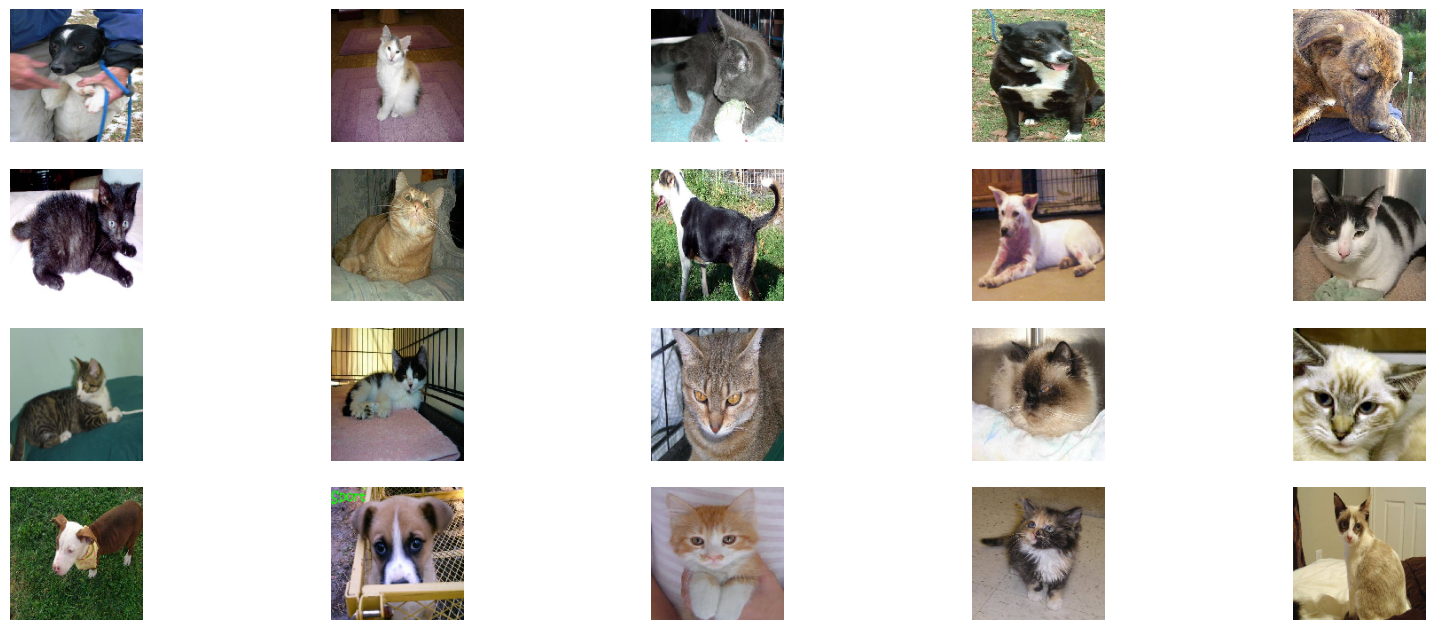

In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


def display_images(img_paths, cols=5):
    plt.figure(figsize=(20, 10))
    for i, img_path in enumerate(img_paths):
        img = image.load_img(img_path, target_size=(150, 150))
        plt.subplot(len(img_paths) // cols + 1, cols, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()


test_images_dir = '/kaggle/working/test/test1'
all_test_images = [os.path.join(test_images_dir, f) for f in os.listdir(test_images_dir) if f.endswith('.jpg')]
all_test_images = sorted(all_test_images)[:20]  # 获取前20张图片


display_images(all_test_images)


In [ ]:
# Image generators for train and validation datasets
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import train_test_split
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Build the baseline model
baseline_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the baseline model
history_baseline = baseline_model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=50
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.
Epoch 1/40
100/100 [==============================] - 12s 56ms/step - loss: 0.6920 - accuracy: 0.5315 - val_loss: 0.7984 - val_accuracy: 0.4840
Epoch 2/40
100/100 [==============================] - 5s 55ms/step - loss: 0.6915 - accuracy: 0.5320 - val_loss: 0.6871 - val_accuracy: 0.5680
Epoch 3/40
100/100 [==============================] - 6s 64ms/step - loss: 0.6621 - accuracy: 0.6005 - val_loss: 0.6669 - val_accuracy: 0.5900
Epoch 4/40
100/100 [==============================] - 6s 56ms/step - loss: 0.6876 - accuracy: 0.5520 - val_loss: 0.6802 - val_accuracy: 0.5510
Epoch 5/40
100/100 [==============================] - 5s 51ms/step - loss: 0.6637 - accuracy: 0.5930 - val_loss: 0.6379 - val_accuracy: 0.6220
Epoch 6/40
100/100 [==============================] - 5s 50ms/step - loss: 0.6399 - accuracy: 0.6405 - val_loss: 0.6444 - val_accuracy: 0.6340
Epoch 7/40
100/100 [==============================] - 6s

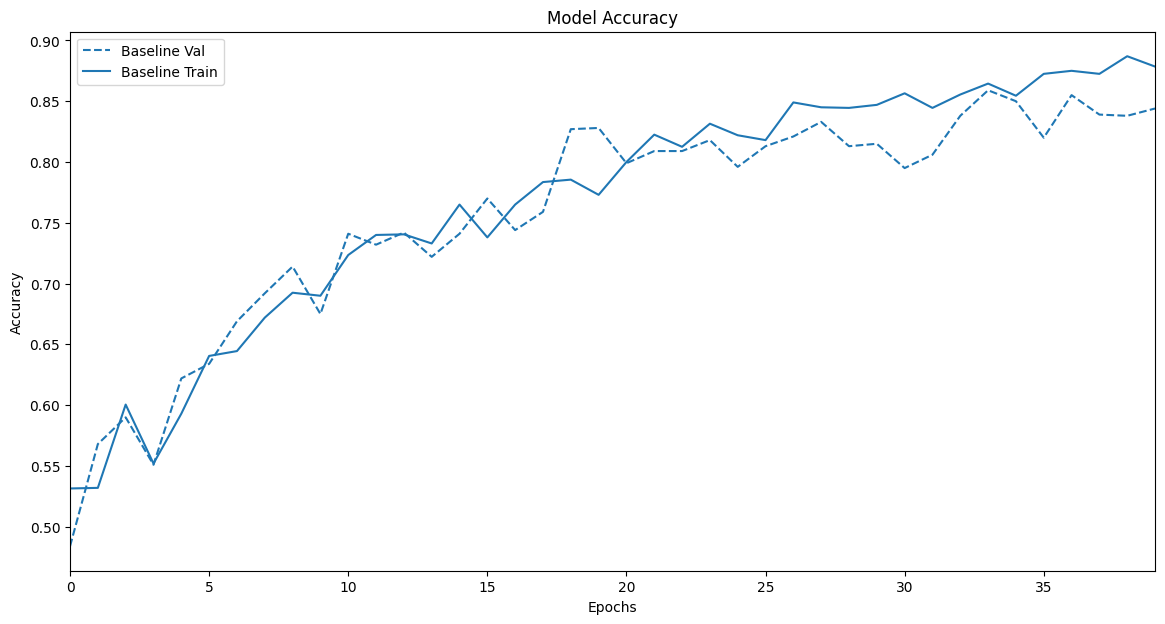

In [ ]:
# Plot training and validation accuracy
def plot_history(histories, title):
    plt.figure(figsize=(14, 7))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_accuracy'], '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history['accuracy'], color=val[0].get_color(), label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.xlim([0, max(history.epoch)])
    plt.show()

plot_history([('Baseline', history_baseline)], 'Model Accuracy')

Saving images.jpg to images (2).jpg
1/1 [==============================] - 0s 74ms/step


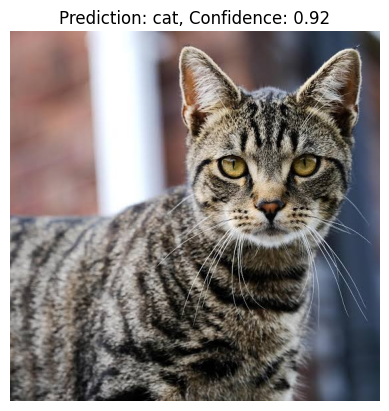

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 保存模型
model_path = 'my_model.h5'
baseline_model.save(model_path)

# 加載訓練好的模型
model = tf.keras.models.load_model(model_path)

# 定義圖片預處理函數
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # 與訓練和驗證時一樣的預處理
    return img_array

# 定義圖片上傳和預測函數
def upload_and_predict():
    uploaded = files.upload()

    for fn in uploaded.keys():
        img_path = fn
        img_array = preprocess_image(img_path)
        prediction = model.predict(img_array)
        predicted_class = 'dog' if prediction[0][0] > 0.5 else 'cat'
        confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

        plt.imshow(image.load_img(img_path))
        plt.title(f'Prediction: {predicted_class}, Confidence: {confidence:.2f}')
        plt.axis('off')
        plt.show()

# 調用上傳和預測函數
upload_and_predict()
